# Color Threshold, Green Screen

### Import resources

In [68]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [69]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)

Image dimensions: (450, 660, 3)


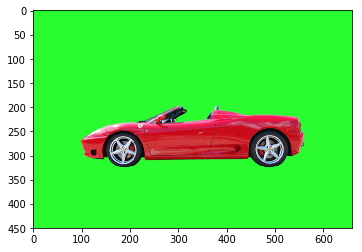

In [70]:
# Display the image
plt.imshow(image)

### Define the color threshold

In [71]:
## TODO: Define our color selection boundaries in RGB values
lower_green = np.array([0,180,0]) 
upper_green = np.array([100,255,100])

### Create a mask

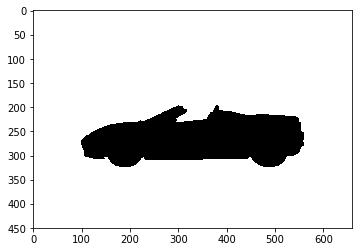

In [72]:
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
# Define the masked area
mask = cv2.inRange(image_copy, lower_green, upper_green)
# Vizualize the mask
plt.imshow(mask, cmap='gray')

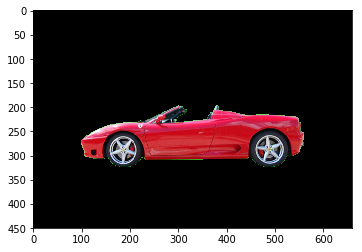

In [73]:
# Mask the image to let the car show through
masked_image = np.copy(image)
masked_image[mask != 0] = [0, 0, 0] # 使在mask不为黑色区域对应的masked_image中区域呈黑色
# Display it!
plt.imshow(masked_image)

### Mask and add a background image

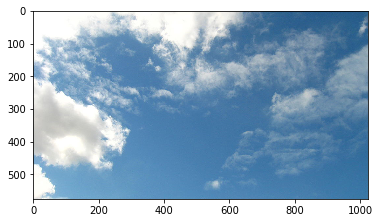

In [74]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')
plt.imshow(background_image)

In [75]:
print(background_image.shape)
print(mask.shape)

(575, 1024, 3)
(450, 660)


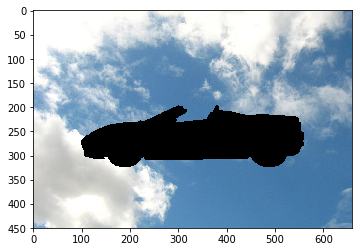

In [76]:
## TODO: Crop it or resize the background to be the right size (450x660)
# Hint mask the opposite area of the previous image
crop_background = np.copy(background_image)
crop_background =crop_background[:450, 0:660]

crop_background[mask != 255] = [0, 0, 0]
# Display the background
plt.imshow(crop_background)

### Create a complete image

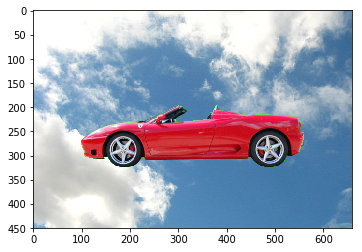

In [66]:
## TODO: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background
# Display the result
plt.imshow(complete_image)